In [189]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [216]:
df = pd.read_csv('data/medical_examination.csv')

In [217]:
df.head()

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [218]:
df.shape

(70000, 13)

In [222]:
df['overweight'] = ((df['weight'] / (df['height'] ** 2)) > 25).astype(int)

In [223]:
df[['cholesterol', 'gluc']] = np.where(df[['cholesterol', 'gluc']] > 0, 1, 0)

In [224]:
 df['cholesterol']

0        1
1        1
2        1
3        1
4        1
        ..
69995    1
69996    1
69997    1
69998    1
69999    1
Name: cholesterol, Length: 67260, dtype: int64

In [225]:
number_of_cardio =df.loc[(df['gluc'] == 1)]

In [131]:
def draw_cat_plot(df):
    
    
    cat_plot = sns.catplot(
        data=df,
        x='active',
        kind='count',
        hue='active', 
        height=6,
        width=0.1,
        aspect=0.5,
        legend=True,
       # palette={0: "blue", 1: "yellow", 2: "orange"}
        palette={0: "blue", 1: "orange"},
      
    )
    cat_plot.set_axis_labels("Cholesterol (0 = Good, 1 = Bad)", "Number of Patients")
    #cat_plot.fig.suptitle("cholesterol")
    plt.show()

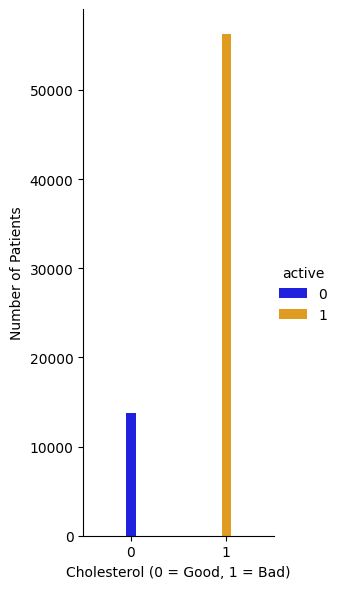

In [174]:
draw_cat_plot(df)

In [175]:
def draw_cat_plot(df):
    
   cat_plot = sns.countplot(df, x="active", 
                 hue='active',
                 width=0.8,
                 gap=0,
                 native_scale=False
                )
   
   plt.show()

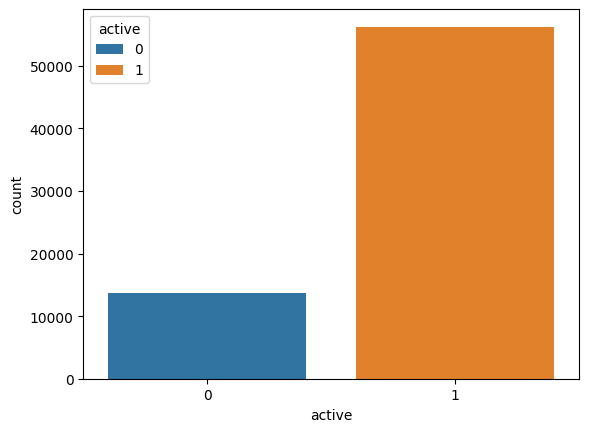

In [176]:
draw_cat_plot(df)

# Absence of cardiovascular disease

        cardio variable  value
0            0   active      1
1            1   active      1
2            1   active      0
3            1   active      1
4            0   active      0
...        ...      ...    ...
419995       0     alco      0
419996       1     alco      0
419997       1     alco      1
419998       1     alco      0
419999       0     alco      0

[420000 rows x 3 columns]


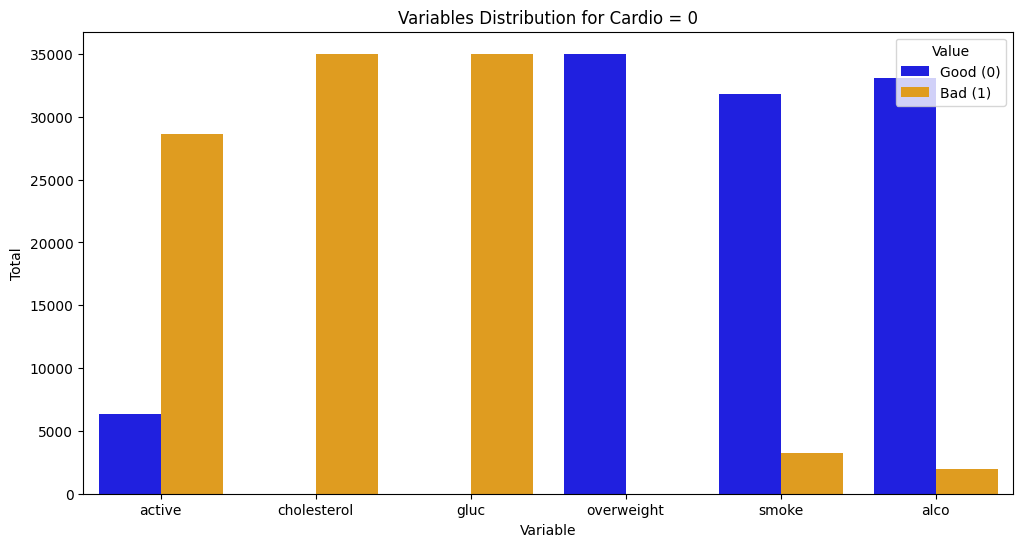

In [178]:
dfnew = pd.DataFrame(df)
#print(dfnew)
def draw_single_cat_plot(df):
    df_melted = pd.melt(
        df,
        id_vars=['cardio'],
        value_vars=['active', 'cholesterol', 'gluc', 'overweight', 'smoke', 'alco'],
        var_name='variable',
        value_name='value'
    )
    
    print(df_melted)
    plt.figure(figsize=(12, 6))
    sns.countplot(
        data=df_melted[df_melted['cardio'] == 0],
        x='variable',
        hue='value',
        palette={0: "blue", 1: "orange"}
    )
    plt.title("Variables Distribution for Cardio = 0")
    plt.xlabel("Variable")
    plt.ylabel("Total")
    plt.legend(title="Value", loc="upper right", labels=["Good (0)", "Bad (1)"])
    plt.show()

draw_single_cat_plot(df)


# Presence of cardiovascular disease

        cardio variable  value
0            0   active      1
1            1   active      1
2            1   active      0
3            1   active      1
4            0   active      0
...        ...      ...    ...
403555       0     alco      0
403556       1     alco      0
403557       1     alco      1
403558       1     alco      0
403559       0     alco      0

[403560 rows x 3 columns]


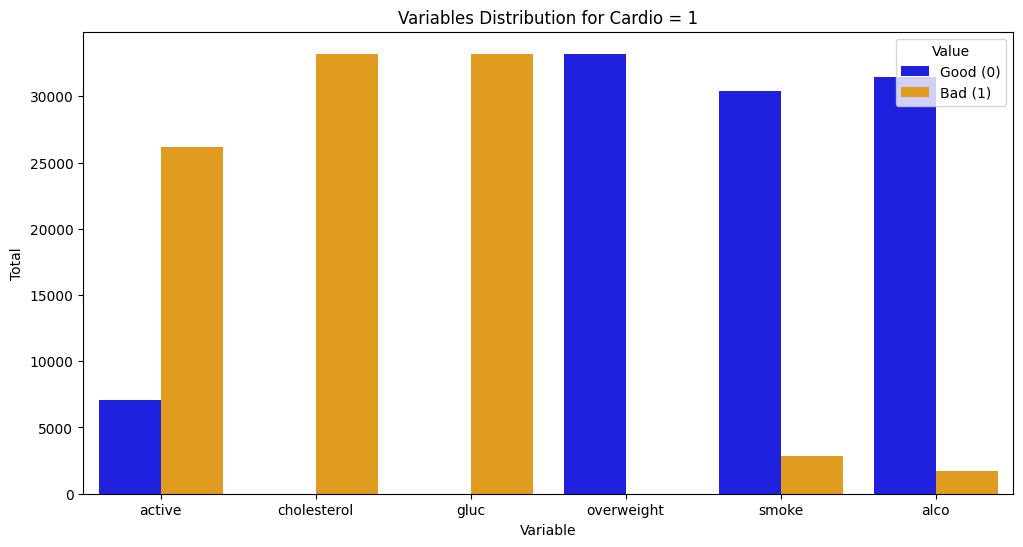

In [226]:
#dfnew = pd.DataFrame(df)
#print(dfnew)
def draw_single_cat_plot(df):
    df_melted = pd.melt(
        df,
        id_vars=['cardio'],
        value_vars=['active', 'cholesterol', 'gluc', 'overweight', 'smoke', 'alco'],
        var_name='variable',
        value_name='value'
    )
    
    print(df_melted)
    plt.figure(figsize=(12, 6))
    sns.countplot(
        data=df_melted[df_melted['cardio'] == 1], 
        x='variable',
        hue='value',
        palette={0: "blue", 1: "orange"}
    )
    plt.title("Variables Distribution for Cardio = 1")
    plt.xlabel("Variable")
    plt.ylabel("Total")
    plt.legend(title="Value", loc="upper right", labels=["Good (0)", "Bad (1)"])
    plt.show()

draw_single_cat_plot(df)

# Clean the data in the df_heat variable by filtering out the following patient segments, this for diastolic pressure is higher than systolic

In [227]:
df = df[df['ap_lo'] <= df['ap_hi']]
df.shape

(67260, 14)

# Clean the data in the df_heat variable by filtering out the following patient segments for 
# height is less than the 2.5th percentile (Keep the correct data with (df['height'] >= df['height'].quantile(0.025)))

In [228]:
# height extreemly low beyond usual, outliers(white noise(uncorrelated)
df = df[df['height'] >= df['height'].quantile(0.025)]
df.shape

(65633, 14)

# height is more than the 97.5th percentile

In [229]:
# hieght extremly greater, extreem tall than usual, outliers(white noise(uncorrelated)
df = df[df['height'] <= df['height'].quantile(0.975)]
df.shape

(64232, 14)

# weight is less than the 2.5th percentile

In [230]:
# weight too small beyond normal: outliers(white noise(uncorrelated)
df = df[df['weight'] >= df['weight'].quantile(0.025)]
df.shape

(62961, 14)

# weight is more than the 97.5th percentile

In [231]:
# weight too large beyond normal: outliers(white noise(uncorrelated))
df = df[df['weight'] <= df['weight'].quantile(0.975)]
df.shape

(61474, 14)

# Draw a heat map

# Draw a single heat map

(14, 14)


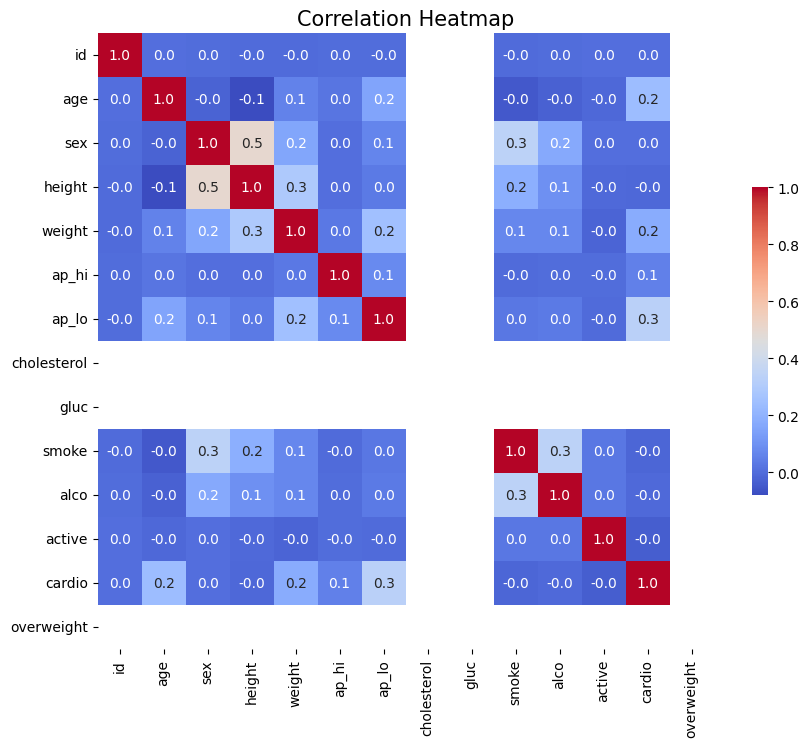

In [209]:
#corr = df.corr()
plt.figure(figsize=(10, 8))
print(corr.shape)

sns.heatmap(
    corr, 
    annot=True,           
    fmt=".1f",             
    cmap="coolwarm",       
    square=True,        
    cbar_kws={'shrink': 0.5}  
)

plt.title("Correlation Heatmap", fontsize=15)
plt.show()


# Calculate the correlation matrix and store it in the corr variable.

In [232]:
corr = df.corr()

# Generate a mask for the upper triangle and store it in the mask variable.

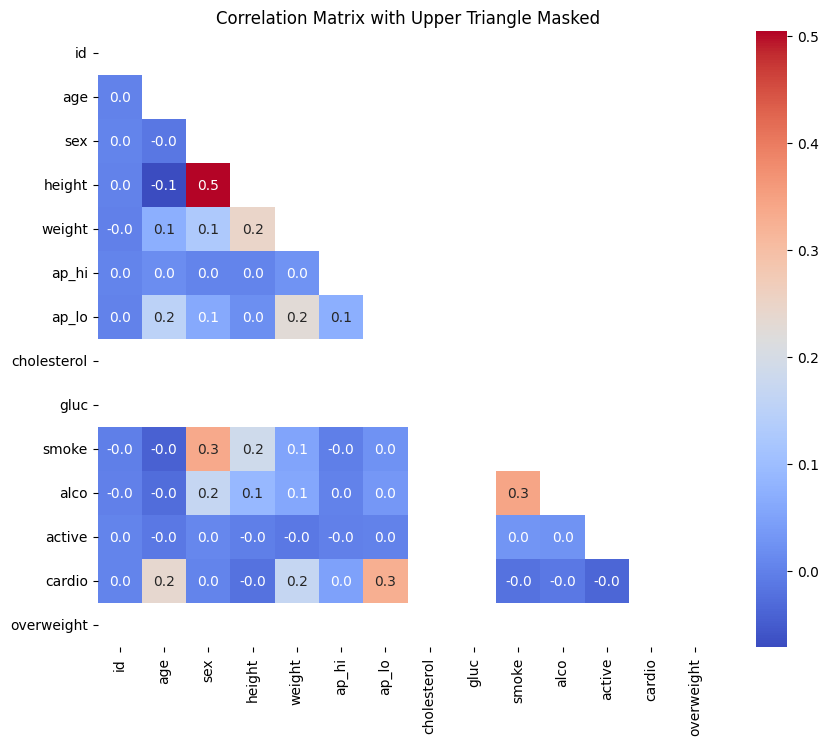

In [233]:
mask = np.triu(np.ones_like(corr, dtype=bool))

plt.figure(figsize=(10, 8))
sns.heatmap(corr, mask=mask, annot=True, cmap="coolwarm", fmt=".1f")

plt.title("Correlation Matrix with Upper Triangle Masked")
plt.show()

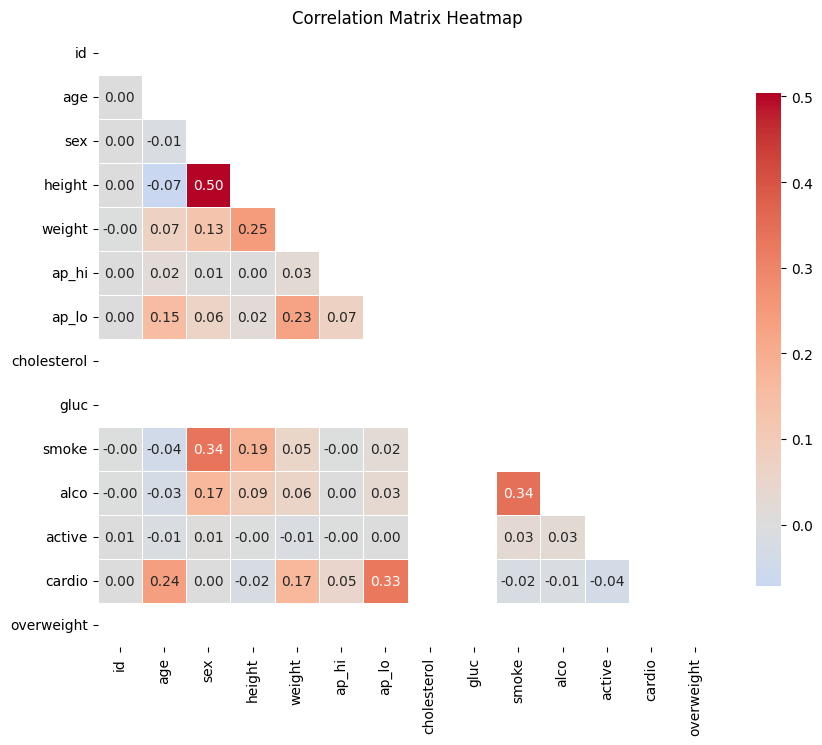

In [237]:
df = pd.DataFrame(df)

# Compute the correlation matrix
corr = df.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
fig, ax = plt.subplots(figsize=(10, 8))  # Adjust the size as needed

# Draw the heatmap
sns.heatmap(
    corr,
    mask=mask,  # Apply the mask to hide the upper triangle
    annot=True,  # Show the correlation values on the heatmap
    fmt=".2f",   # Format for the correlation values
    cmap="coolwarm",  # Choose a color palette
    center=0,    # Center the colormap at zero
    linewidths=0.5,  # Add lines between cells
    cbar_kws={"shrink": 0.8}  # Shrink the color bar size
)

# Add a title to the heatmap
plt.title("Correlation Matrix Heatmap")

# Save the plot
plt.savefig("correlation_matrix_heatmap.png", dpi=300, bbox_inches='tight')

# Show the plot
plt.show()
